In [13]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

train_size = 20

test_size = 12

train_X = np.random.uniform(low=0, high=1.2, size=train_size)
test_X = np.random.uniform(low=0, high=1.2, size=test_size)

train_y = np.sin(train_X * 2 * np.pi) + np.random.normal(0, 0.2, train_size)
test_y = np.sin(test_X * 2 * np.pi) + np.random.normal(0, 0.2, test_size)

In [50]:
poly = PolynomialFeatures(6)

train_poly_x = poly.fit_transform(train_X.reshape(train_size, 1))
test_poly_x = poly.fit_transform(test_X.reshape(test_size, 1))

model = Ridge(alpha=1.0)
model.fit(train_poly_x, train_y)

train_pred_y = model.predict(train_poly_x)
test_pred_y = model.predict(test_poly_x)

In [51]:
print(mean_squared_error(train_pred_y, train_y))
print(mean_squared_error(test_pred_y, test_y))

0.1738498845050493
0.21906014696520196


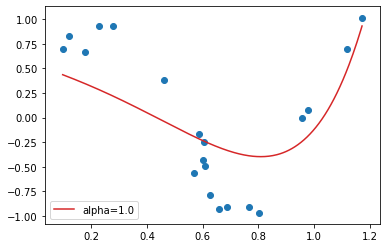

In [56]:
import matplotlib.pyplot as plt

plt.scatter(train_X, train_y, color='tab:blue')
#plt.scatter(train_X, train_pred_y, color='tab:red')

import pandas as pd
d = {'x': train_X, 'y': train_pred_y}
df = pd.DataFrame(data=d)
df.sort_values(by='x', inplace=True)
#plt.plot(df.x, df.y, color='tab:red')

from scipy.interpolate import make_interp_spline, BSpline
xnew = np.linspace(df.x.min(), df.x.max(), 300)

spl = make_interp_spline(df.x, df.y, k=3)
power_smooth = spl(xnew)

plt.plot(xnew, power_smooth, color='tab:red', label="alpha=1.0")
plt.legend()